Develop an algorithm to predict fraud. Prioritize correctly finding fraud rather than correctly labeling non-fraudulent transactions.

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import preprocessing
import time

In [2]:
# Credit Card Fraud dataset from https://www.kaggle.com/mlg-ulb/creditcardfraud/data
credit_card = pd.read_csv('~/Desktop/Data_Science/creditcard.csv')

In [3]:
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit_card.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
credit_card.shape

(284807, 31)

### Class

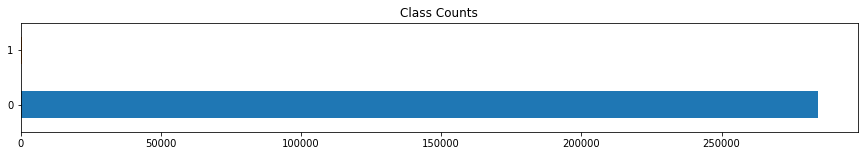

0    284315
1       492
Name: Class, dtype: int64

Portion of records classified as fraud: 0.002


In [6]:
plt.figure(figsize=(15, 2))
plt.title('Class Counts')
pd.value_counts(credit_card['Class']).plot.barh()
plt.xticks(rotation = 0)
plt.show()

print(credit_card['Class'].value_counts())

print("\nPortion of records classified as fraud: %0.3f" % (credit_card['Class'].value_counts()[1]/credit_card.shape[0]))

Very few of the records are classified as fraud, just 0.2%

### Feature Correlation

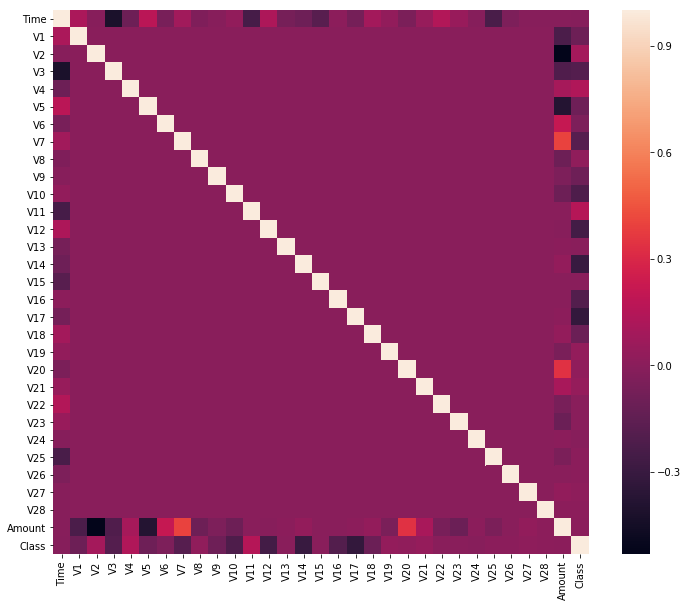

In [7]:
corr = credit_card.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

No correlation between features.

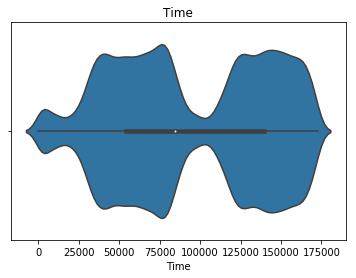

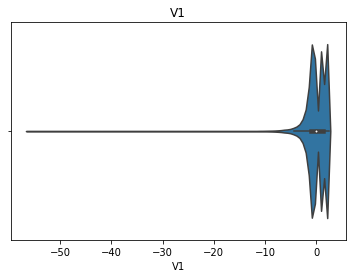

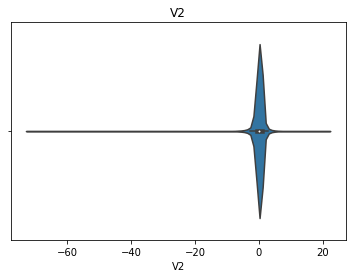

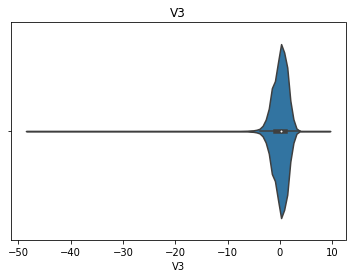

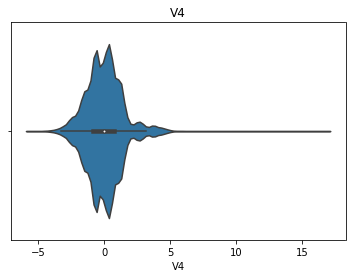

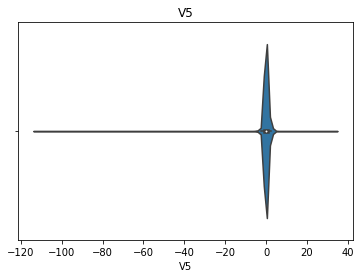

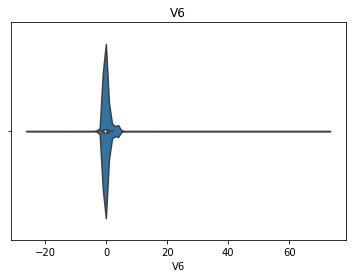

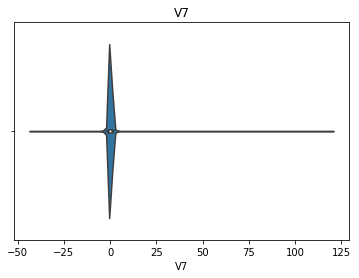

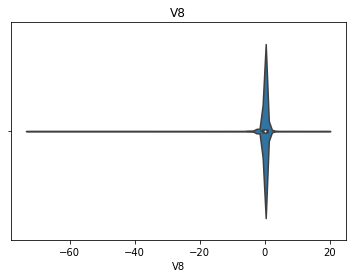

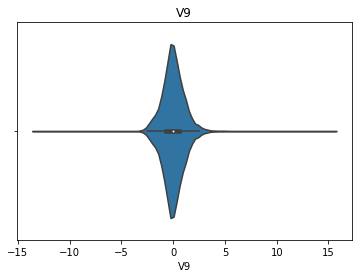

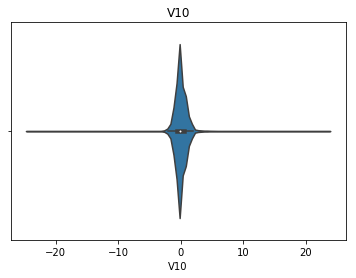

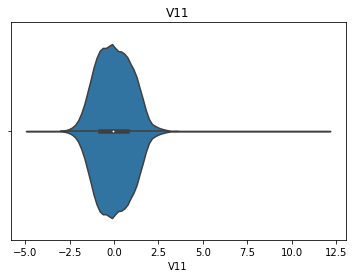

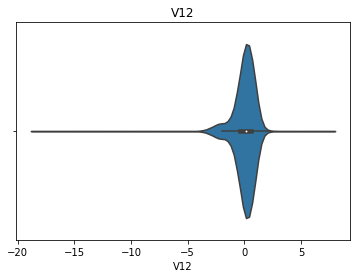

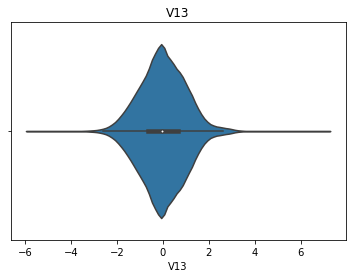

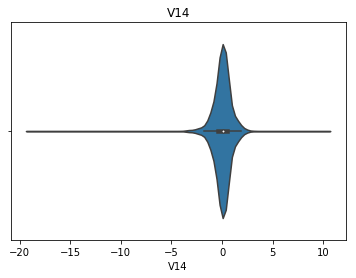

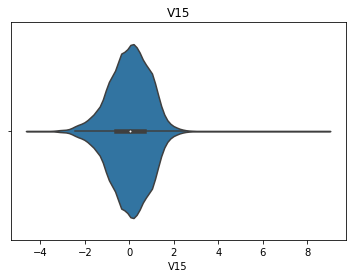

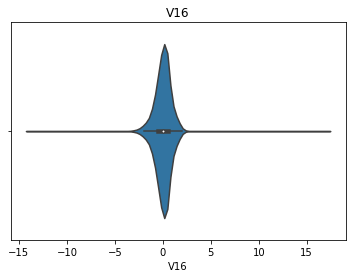

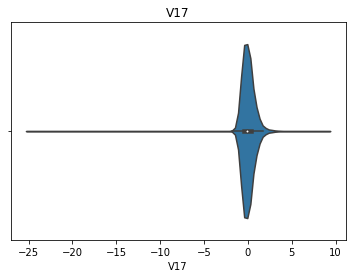

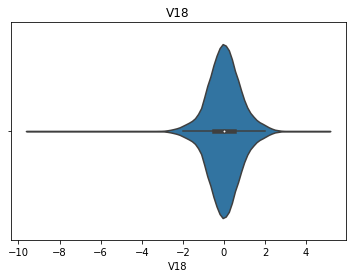

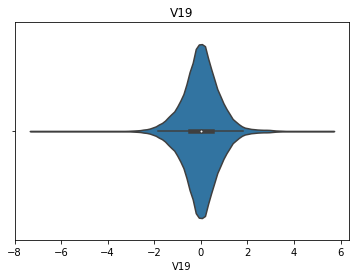

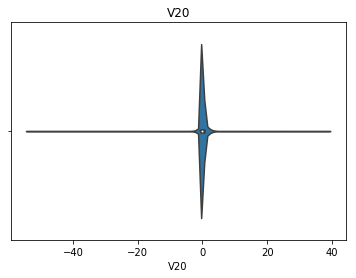

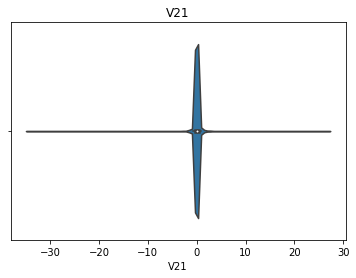

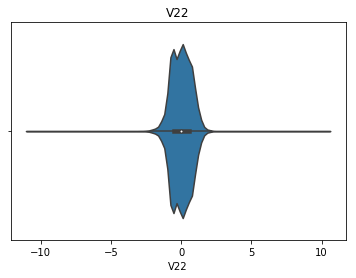

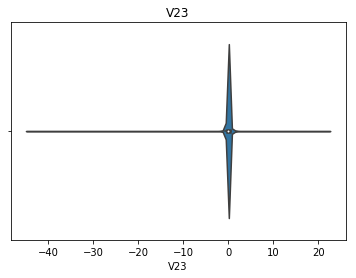

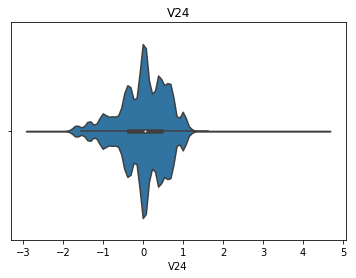

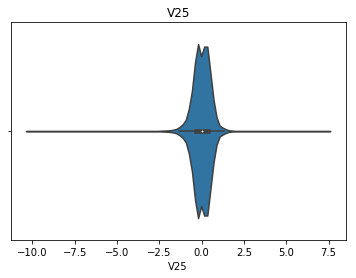

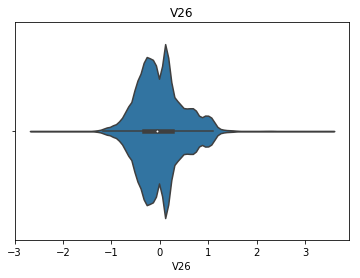

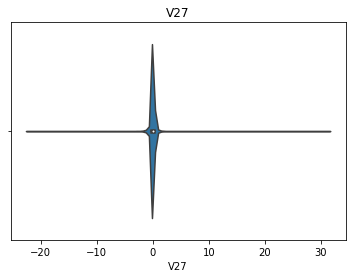

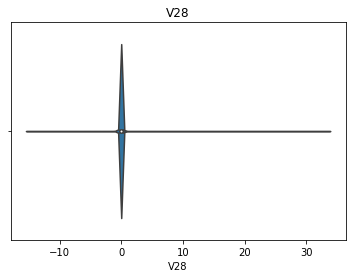

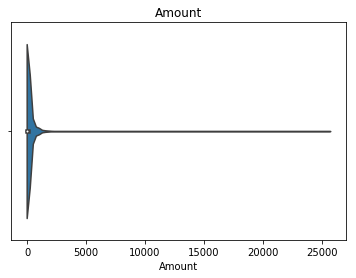

In [40]:
X = credit_card.drop(['Class'], axis=1)

for column in X:
    sns.violinplot(x=credit_card[column])
    plt.title(column)
    plt.show()

In [45]:
features = credit_card.drop(['Class', 'Time', 'Amount'], axis=1)
feature_list = features.columns

In [47]:
sns.factorplot(y=feature_list, hue=credit_card["Class"], kind="violin")


TypeError: object of type 'NoneType' has no len()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


ValueError: color kwarg must have one color per dataset

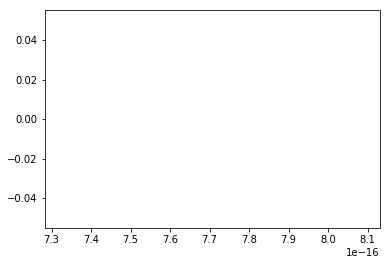

In [49]:
for column in features:
    sns.distplot(features)

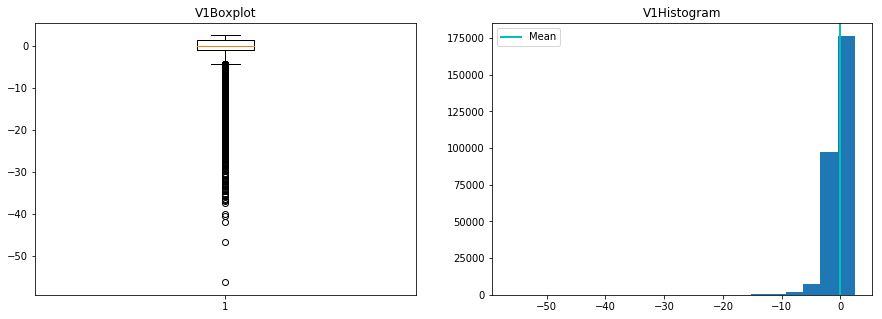

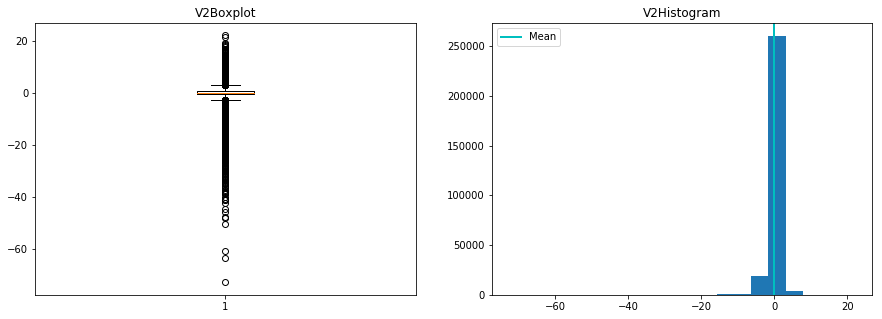

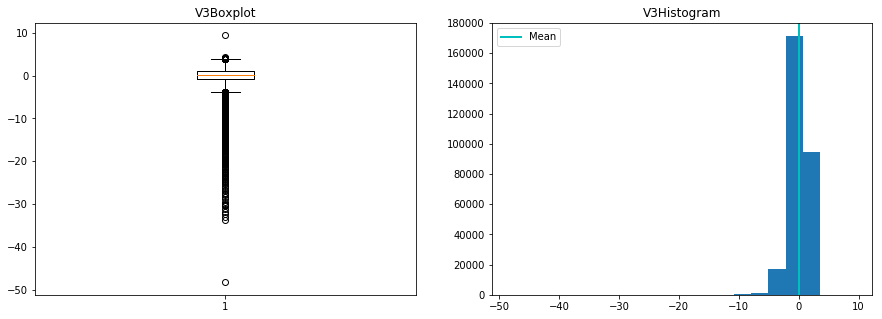

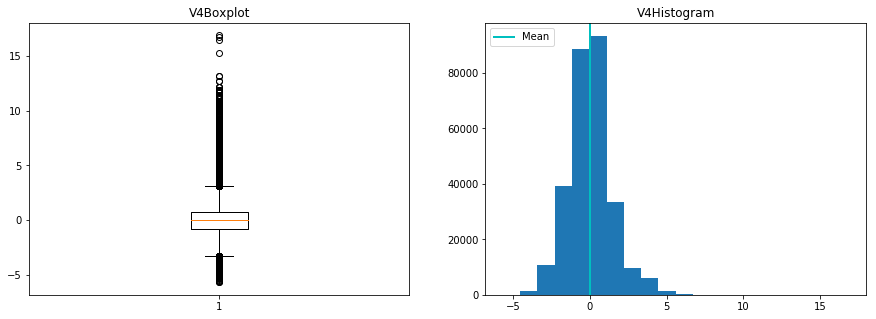

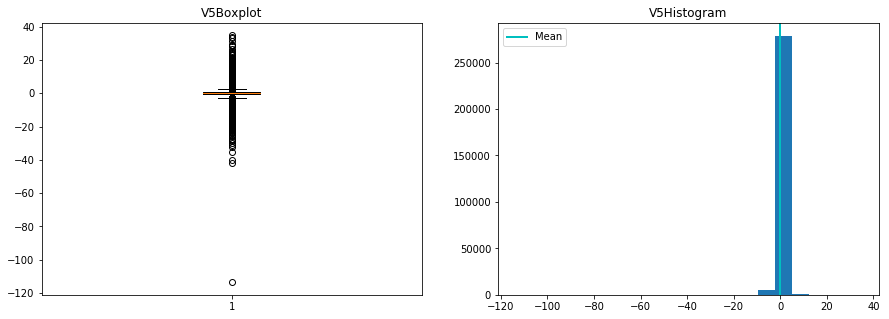

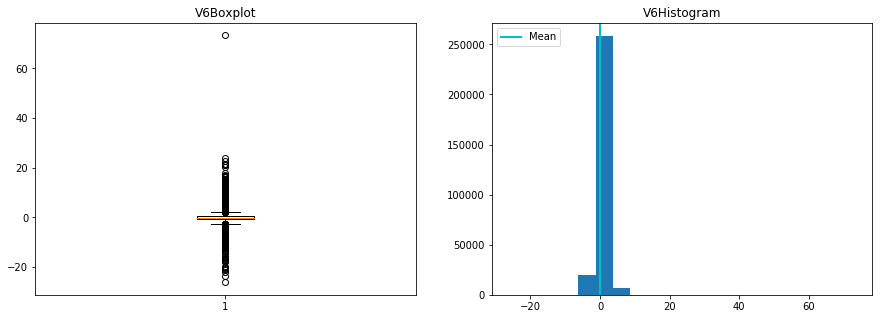

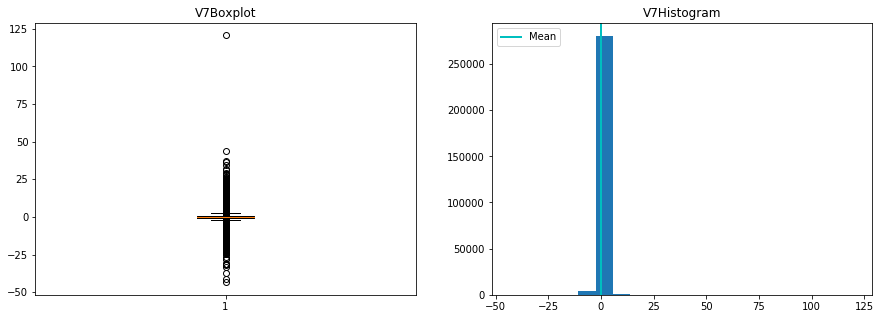

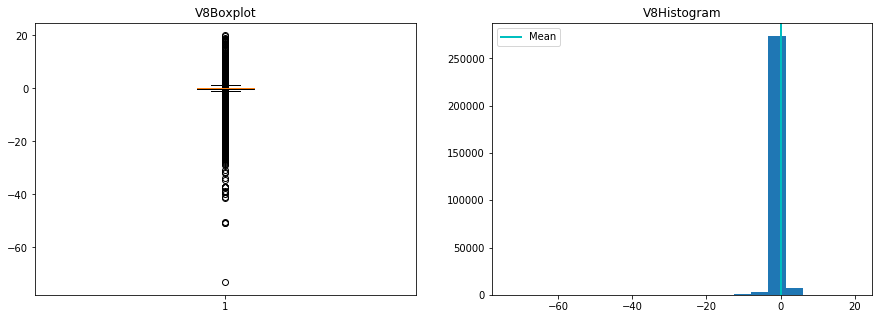

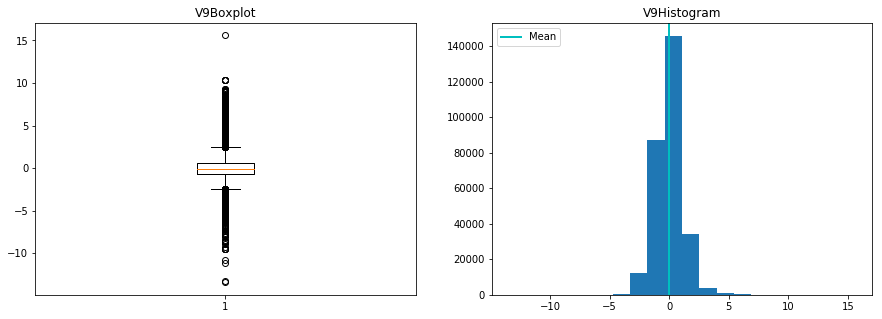

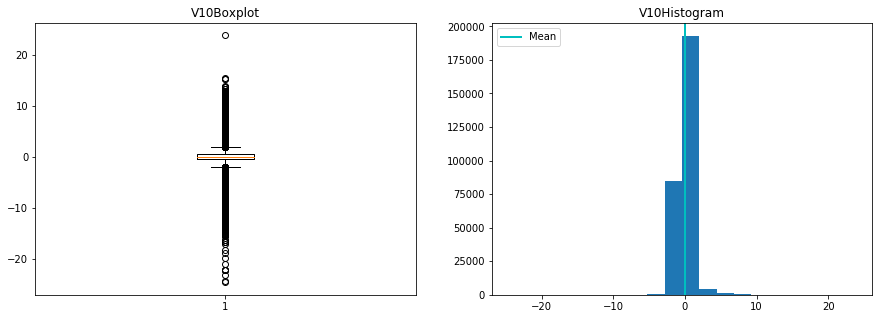

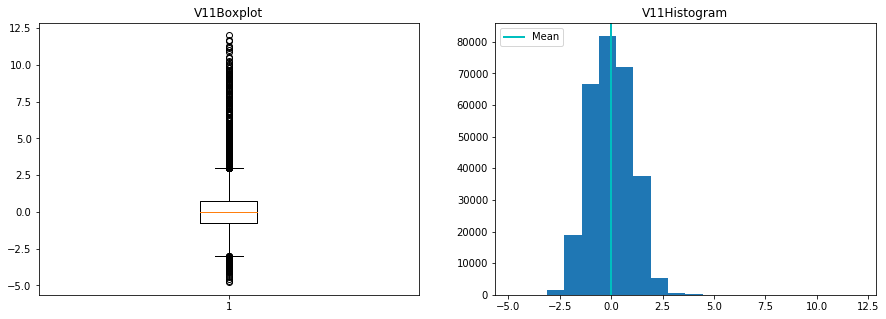

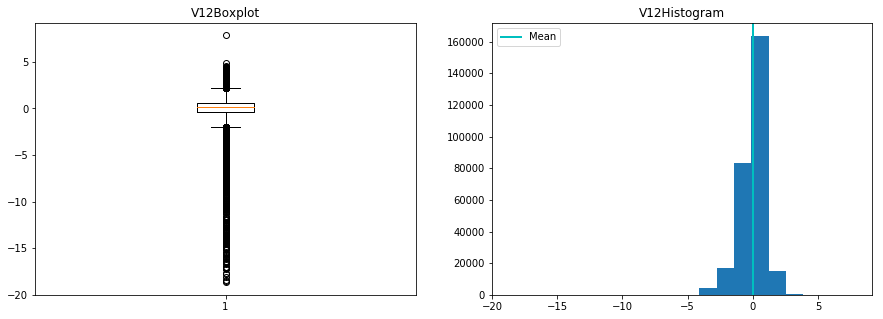

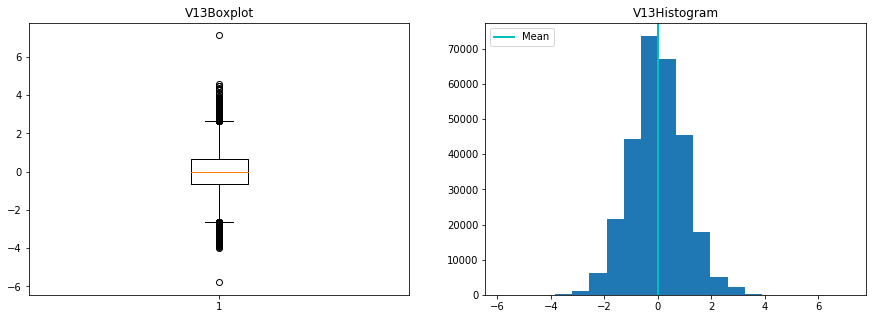

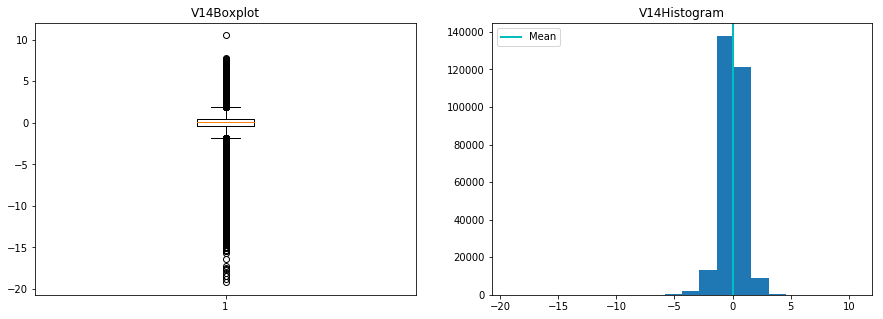

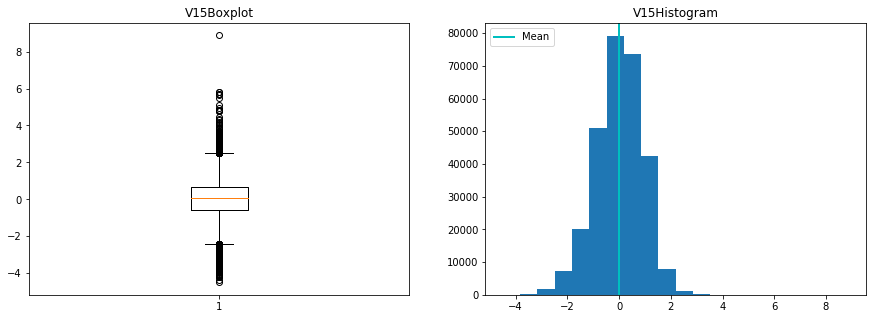

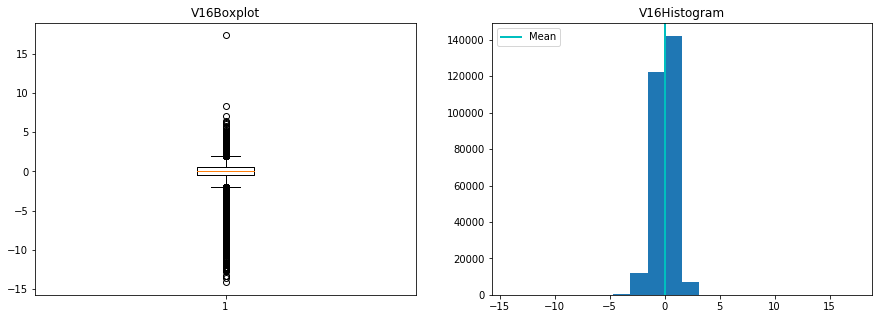

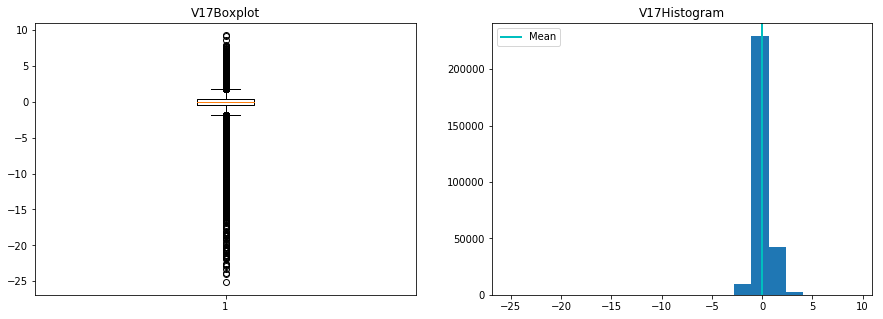

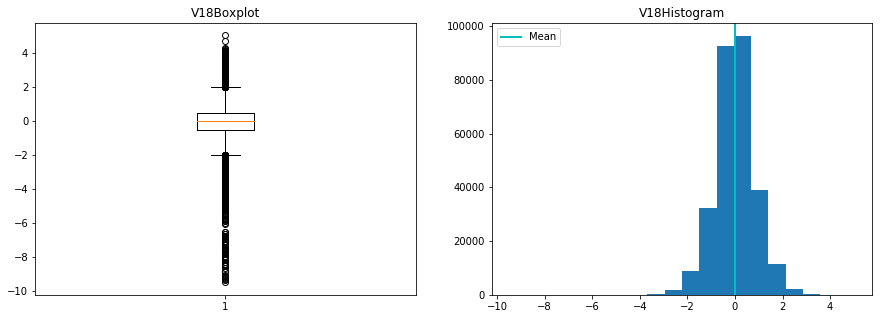

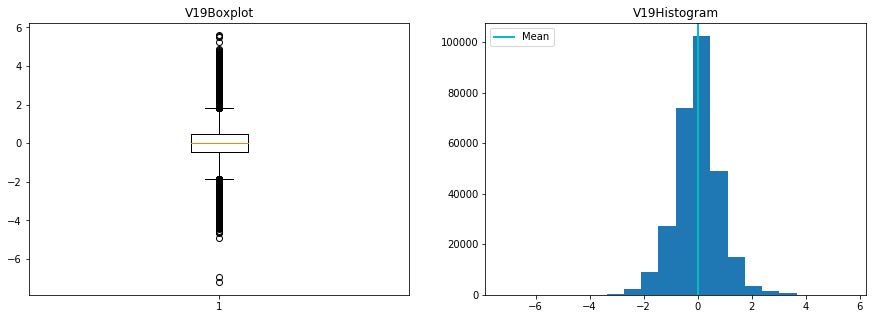

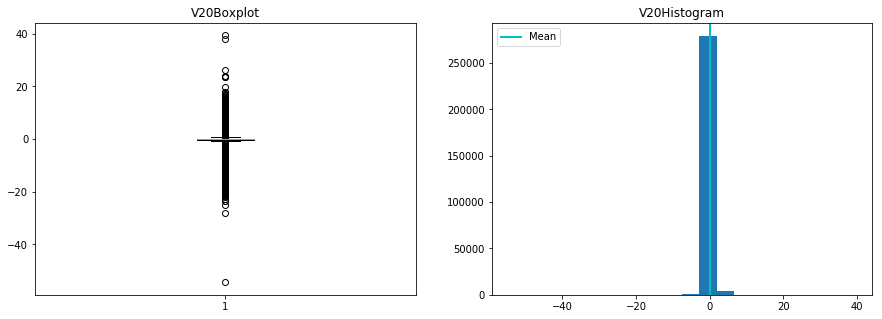

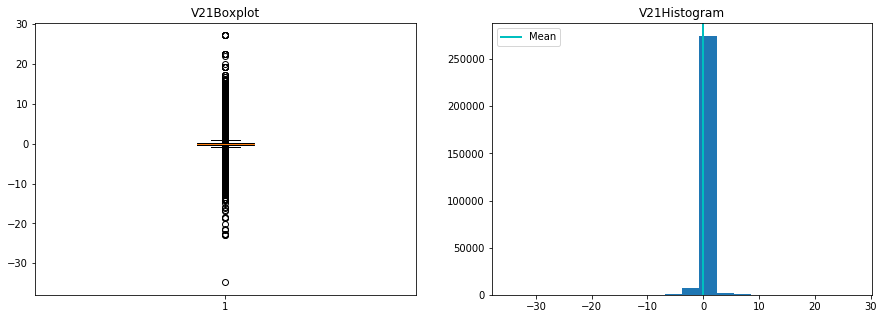

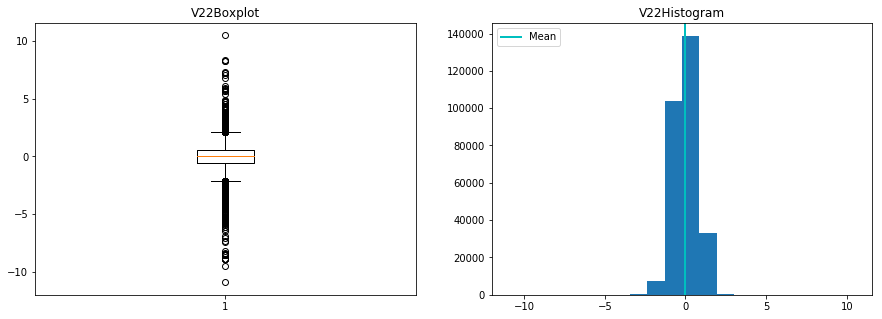

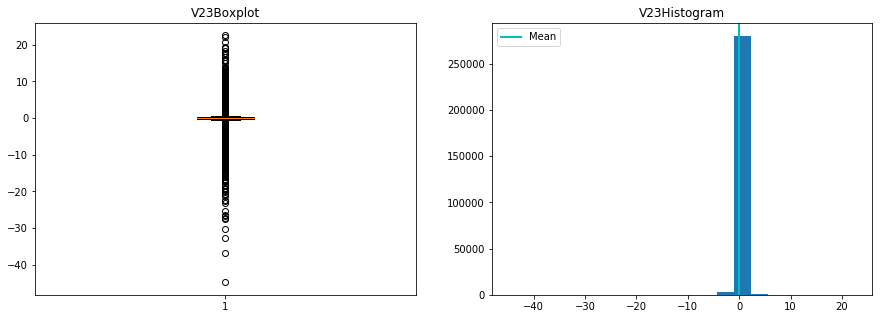

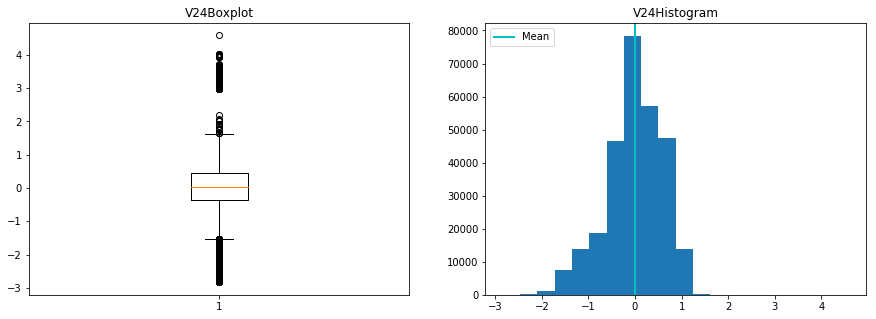

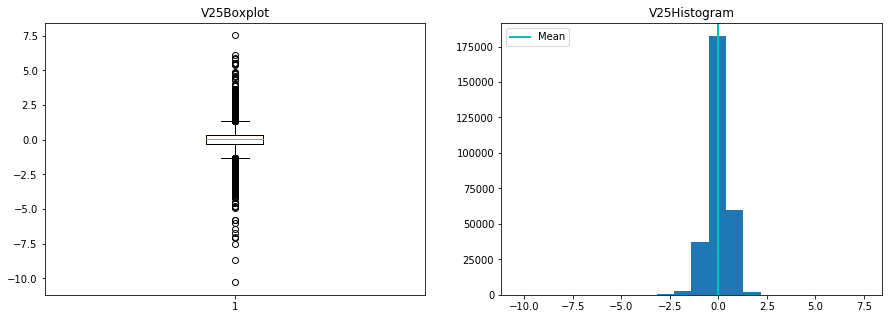

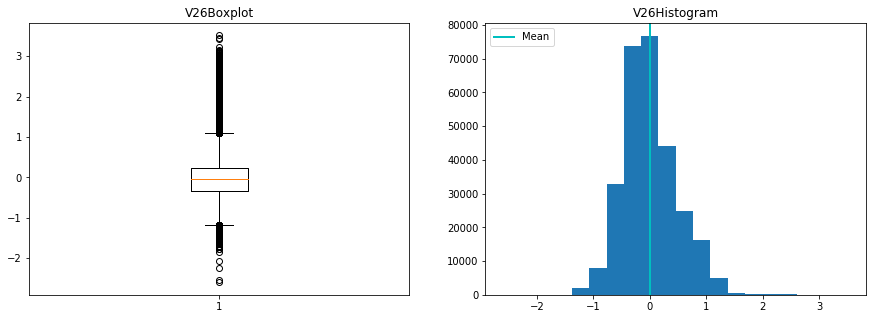

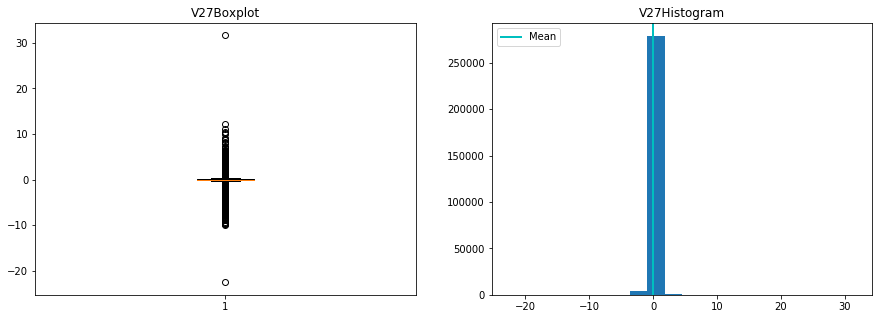

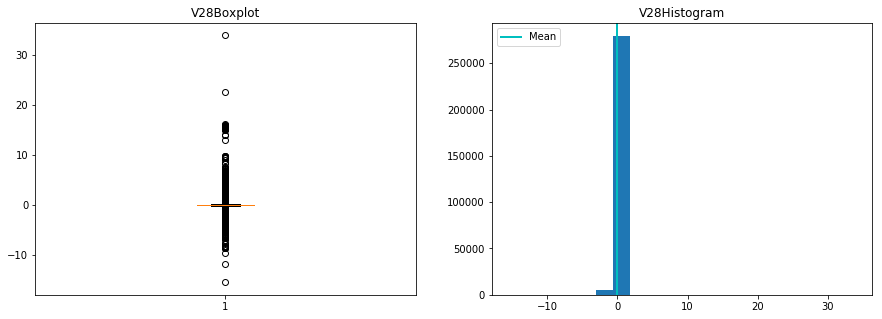

In [8]:
features = credit_card.drop(['Class', 'Time', 'Amount'], axis=1)

# Boxplots of features
for column in features:
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.boxplot(credit_card[column].dropna(how = 'any'))
    plt.title(column + 'Boxplot')

    plt.subplot(1, 2, 2)
    plt.hist(credit_card[column].dropna(how = 'any'), bins=20)
    plt.axvline(credit_card[column].mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
    plt.legend(loc='upper left') 
    plt.title(column + 'Histogram')

    plt.show()


In [ ]:
plt.boxplot(features)

plt.show()

## Random Forest
Take advantage of bagging to make the most of the few fraud observations in Class

In [ ]:
X = credit_card.drop(['Class'], axis=1)
Y = credit_card['Class']

In [ ]:
#Test max_features

tune_results = pd.DataFrame()

def forest_feature_fit(feature):
    rfc = ensemble.RandomForestClassifier(
        max_features=feature
    )
    score = cross_val_score(rfc, X, Y, cv=10)
    data = pd.DataFrame({"feature_number": [feature], "mean": [score.mean()], "std": [score.std()]})
    return data
                                       
appended_data = []
for i in range(7):
    result = forest_feature_fit(i + 1)
    appended_data.append(result)
tune_results = pd.concat(appended_data, ignore_index=True)

tune_results.loc[tune_results['std'] == tune_results['std'].min()]

plt.plot(tune_results['feature_number'], tune_results['mean'], label="Mean")
plt.plot(tune_results['feature_number'], tune_results['std'], label="STD")
plt.xlabel('Max Depth')
plt.ylabel('Cross Validation Score')
plt.legend(loc='best') 
plt.title('Feature Test')
plt.show()